In [1]:
import pandas
import seaborn
import numpy
from matplotlib import pyplot
import warnings

warnings.filterwarnings('ignore')

## t-test
모집단의 분산과 표준편차를 알지 못할 때 사용되는 통계적 가설 검정 방법으로, 표본에서 추정된 분산이나 표준편차를 활용하여 검정한다.


## t-test를 위한 가정
1. 종속변수는 연속형(양적, Continuous) 변수여야 한다.
2. 독립변수는 이산형/범주형 변수여야 한다.
3. 모집단의 분산과 표준편차를 알 수 없다.
4. 모집단의 분포는 정규분포를 따른다.
5. 등분산성의 가정이 충족되어야 한다.

## 귀무가설(H₀), 대립가설(H1)
1. 귀무가설(H0) : 영가설, A와 B는 차이가 없다.  결과는 우연히 일어난 것이다.
2. 대립가설(H1) : A와 B는 차이가 있다.

In [2]:
table = pandas.DataFrame([['N', 'n'],
                          ['µ', 'x'],
                          ['σ2', 's2'],
                          ['σ', 's']],
                         columns = ['모집단(population)', '표본(sample)'],
                         index = ['관측치', '평균값', '분산', '편차'])
table

,모집단(population),표본(sample)
관측치,N,n
평균값,µ,x
분산,σ2,s2
편차,σ,s


In [15]:
car = pandas.read_csv('auto-mpg.csv')
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
# horsepower 컬럼에서 정수가 될 수 있는 데이터들을 모두 NaN으로 치환한 후에
# horsepower 컬럼에서 NaN이 발견된 모든 행들을 제거
car['horsepower'] = car['horsepower'].replace('?', numpy.nan)
car2 = car.dropna(subset = 'horsepower', how = 'all')
car2['horsepower'] = car2['horsepower'].astype(int)
car2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [22]:
car2['model_year'] += 1900
car2.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,3870,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,3870,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,3870,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,3870,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,3870,1,ford torino


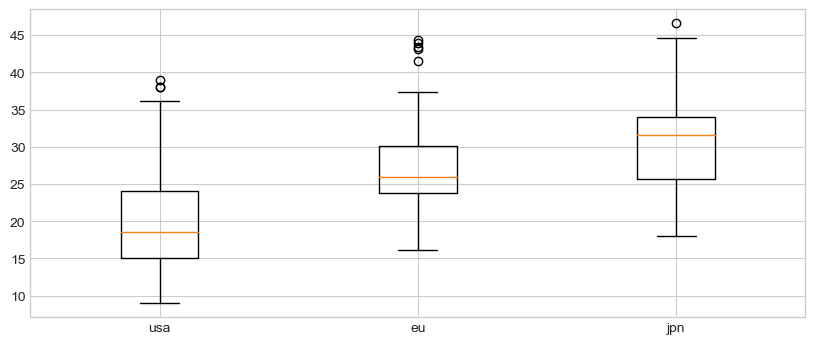

In [24]:
origin_usa = car2[car2['origin'] == 1]['mpg']
origin_eu  = car2[car2['origin'] == 2]['mpg']
origin_jpn = car2[car2['origin'] == 3]['mpg']
origin_list = [origin_usa, origin_eu, origin_jpn]

pyplot.style.use('seaborn-whitegrid')
pyplot.figure(figsize = (10, 4))
pyplot.boxplot(origin_list, labels = ['usa', 'eu', 'jpn'])
pyplot.show()

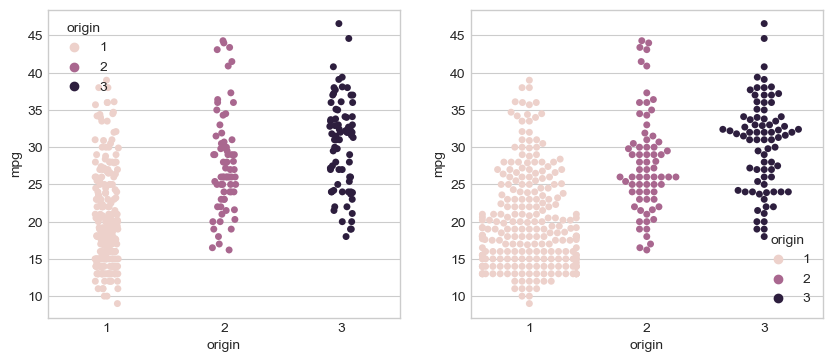

In [26]:
seaborn.set_style('whitegrid')
figure = pyplot.figure(figsize = (10, 4))
ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)
seaborn.stripplot(data = car, hue = 'origin', x = 'origin', y = 'mpg', ax = ax1)
seaborn.swarmplot(data = car, hue = 'origin', x = 'origin', y = 'mpg', ax = ax2)
pyplot.show()

##  단일표본(one-sample) t-test
1. 단일 모집단에 대한 가설 검정
2. 단일 모집단에서 관심이 있는 연속형 변수(Columns)의 평균값을 특정 기준값과 비교할 때 사용
3. 모집단이 정규분포를 따른다는 가정하에 검정통계량(statistic)을 계산
4. 문제에 따라  양측검정(two-sided), 단측검정: 우측검정(greater), 좌측검정(less)
  - 양측검정(two-sided)
    - H0: 평균 ＝ 기준값
    - H1: 평균 ≠ 기준값
  - 우측검정(greater)
    - H0: 평균 ＝ 기준값
    - H1: 평균 > 기준값
  - 좌측검정(less)
    - H0: 평균 ＝ 기준값
    - H1: 평균 < 기준값

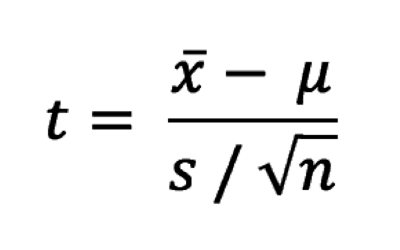

In [27]:
from IPython.display import Image
Image(filename = 'one_sample_t_test_fomula.png')

In [29]:
# 전체 대륙에서 생산된 자동차들의 평균 연비에 비해 미국에서
# 생산된 자동차의 연비가 낮다. - 가설
mean_whole = car2['mpg'].mean()
mean_usa = car2[car2['origin'] == 1]['mpg'].mean()
print('전체평균:', mean_whole)
print('미국평균:', mean_usa)

전체평균: 23.445918367346938
미국평균: 20.0334693877551


In [45]:
mask_usa = car2['origin'] == 1
var_usa = car2[mask_usa]['mpg'].var(ddof = 1)
std_usa = car2[mask_usa]['mpg'].std()
count_usa = len(car2[mask_usa])
print('표준분산:', var_usa)
print('표준편차:', std_usa)
print('표본수량:', count_usa)

표준분산: 41.478547340247566
표준편차: 6.440384098813328
표본수량: 245


In [40]:
sr_usa = car2[mask_usa]['mpg']
print(sum((sr_usa - mean_usa) ** 2) / (len(sr_usa)))
print(sum((sr_usa - mean_usa) ** 2) / (len(sr_usa) - 1))

41.30924714702207
41.47854734024757


In [32]:
# 표본분산, 표본편차 구하는 방법
mask_usa = car2['origin'] == 1
sr_usa = car2[mask_usa]['mpg']

# df(degrees of freedom)
df_usa = count_usa - 1
var_usa = ((sr_usa - mean_usa) ** 2).sum() / df_usa
std_usa = var_usa ** 0.5
print('표준분산:', var_usa)
print('표준편차:', std_usa)
print('표본수량:', count_usa)

표준분산: 41.67166640675675
표준편차: 6.455359510264068
표본수량: 245


In [47]:
# 통계량
statistic = (mean_usa - mean_whole) / (std_usa / (count_usa ** 0.5))
print('통계량:', statistic)
print('자유도:', df_usa)
print(-0.000000000000000001)

통계량: -8.293492188868305
자유도: 244
-1e-19


In [49]:
from scipy import stats

# 단일표본(one-sample) t-test : scipy.stats.ttest_1samp
# scipy.stats.ttest_1samp(Series[배열], 비교값,
#                         alternative = 'two-sided'/'greater'/'less',
#                         nan_policy = 'propagate'/'raise'/'omit',
#                         random_state = None)
mean_whole = car['mpg'].mean()
print('전체평균:', mean_whole, end = '\n\n')
mpg_usa = car[car['origin'] == 1]['mpg']

result = stats.ttest_1samp(mpg_usa, mean_whole, alternative = 'less')
print(result)
print('statistic(통계량):', result.statistic)
print('p-value(p-값):', result.pvalue)
print('df(자유도):', result.df, end = '\n\n')
print('유의확율   5% 미만:', result.pvalue < 0.05)
print('유의확율 0.1% 미만:', result.pvalue < 0.001)
print('유의확율 0.000000001% 미만:', result.pvalue < 0.00000000001)

전체평균: 23.514572864321607

TtestResult(statistic=-8.455691237125226, pvalue=1.2032026478662636e-15, df=248)
statistic(통계량): -8.455691237125226
p-value(p-값): 1.2032026478662636e-15
df(자유도): 248

유의확율   5% 미만: True
유의확율 0.1% 미만: True
유의확율 0.000000001% 미만: True


In [ ]:
from scipy import stats

result = stats.wilcoxon(mpg_usa - mean_whole)
print(result)
print('statistic(통계량):', result.statistic)
print('p-value(p-값):', result.pvalue)
print('유의확율   5% 미만:', result.pvalue < 0.05)
print('유의확율 0.1% 미만:', result.pvalue < 0.001)

##  독립표본(independent-sample, two-sample) t-test
1. 두개의 모집단에 대한 가설 검정
2. 두개의 모집단의 평균을 비교하고자 할 때 사용
3. 가정: 정규성, 독립성, 등분산성
4. 문제에 따라  양측검정(two-sided), 단측검정: 우측검정(greater), 좌측검정(less)
  - 양측검정(two-sided)
    - H0: 집단1_평균 ＝ 집단2_평균
    - H1: 집단1_평균 ≠ 집단2_평균
  - 우측검정(greater)
    - H0: 집단1_평균 ＝ 집단2_평균
    - H1: 집단1_평균 > 집단2_평균
  - 좌측검정(less)
    - H0: 집단1_평균 ＝ 집단2_평균
    - H1: 집단1_평균 < 집단2_평균

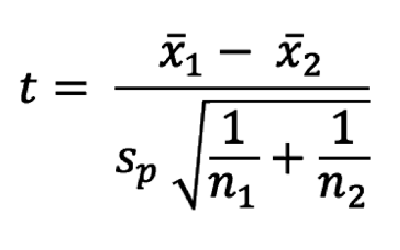

In [50]:
from IPython.display import Image
Image(filename = 'independent_sample_t_test_fomula.png')

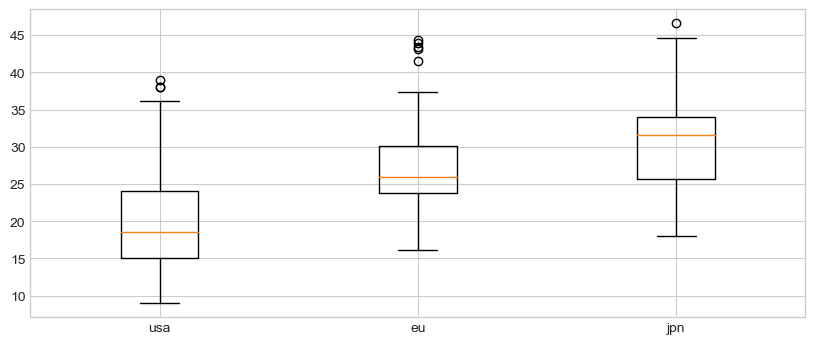

In [52]:
origin_usa = car2[car2['origin'] == 1]['mpg']
origin_eu  = car2[car2['origin'] == 2]['mpg']
origin_jpn = car2[car2['origin'] == 3]['mpg']
origin_list = [origin_usa, origin_eu, origin_jpn]

pyplot.style.use('seaborn-whitegrid')
pyplot.figure(figsize = (10, 4))
pyplot.boxplot(origin_list, labels = ['usa', 'eu', 'jpn'])
pyplot.show()

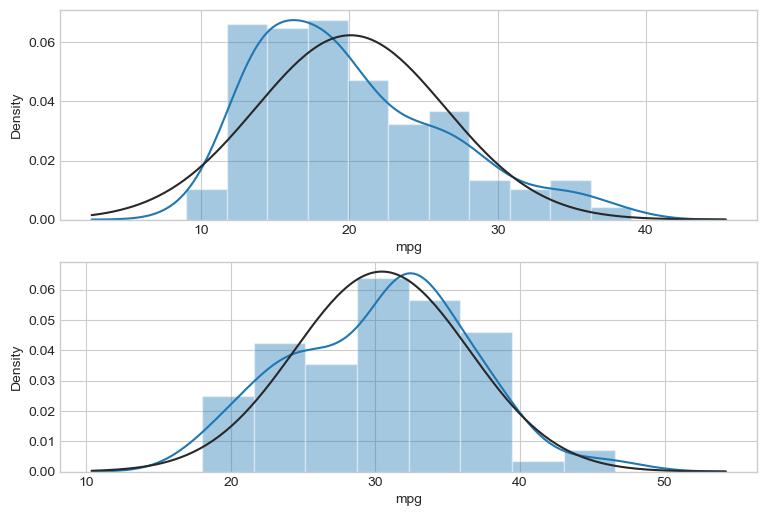

In [53]:
import seaborn
from scipy import stats

# 2개의 샘플의 정규성 여부를 그래프로 확인
mpg_usa = car[car['origin'] == 1]['mpg']
mpg_jpn = car[car['origin'] == 3]['mpg']

figure = pyplot.figure(figsize = (9, 6))
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)
seaborn.distplot(mpg_usa, kde = True, hist = True, fit = stats.norm, ax = ax1)
seaborn.distplot(mpg_jpn, kde = True, hist = True, fit = stats.norm, ax = ax2)
pyplot.show()

In [56]:
from scipy import stats

mpg_usa = car[car['origin'] == 1]['mpg']
mpg_jpn = car[car['origin'] == 3]['mpg']

# 2개의 샘플의 정규성 여부를 확인

# scipy.stats.shapiro(배열)        : Shapiro-Wilk Test, 데이터가 정규분포를 따르는지 검정
#                                                  데이터수가 5000개미만일 때 사용한다.
# scipy.stats.kstest(배열1, 배열2) : Kolmogorove-Smirnov Test, 2개 그룹의 분포가 동일한지 검정
# scipy.stats.kstest(배열, 'norm') : Kolmogorove-Smirnov Test, 데이터가 정규분포를 따르는지 검정
#numpy.random.seed(0)
print(stats.shapiro(mpg_usa))
print(stats.kstest(mpg_usa, 'norm'), end = '\n\n')
print(stats.shapiro(mpg_jpn))
print(stats.kstest(mpg_jpn, 'norm'), end = '\n\n')
print('미국 정규성 유의확률 5%미만:', stats.kstest(mpg_usa, 'norm').pvalue < 0.05)
print('일본 정규성 유의확률 5%미만:', stats.kstest(mpg_usa, 'norm').pvalue < 0.05)

ShapiroResult(statistic=0.9375637173652649, pvalue=8.646131810507995e-09)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.0, statistic_sign=-1)

ShapiroResult(statistic=0.9797353148460388, pvalue=0.24197785556316376)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=18.0, statistic_sign=-1)

미국 정규성 유의확률 5%미만: True
일본 정규성 유의확률 5%미만: True


## 정규성 검정
- 정규성 검정은 데이터가 정규분포를 따르는지 검정하는 것을 의미한다.
- (중심극한정리) 보통 표본이 30개이상인 경우 정규성을 만족한다고 가정합니다.
- 하지만, 표본이 30개 이상이어도 데이터 특성에 의해 정규분를 따르지 않을 수도 있기에 정규성을 진행한다.

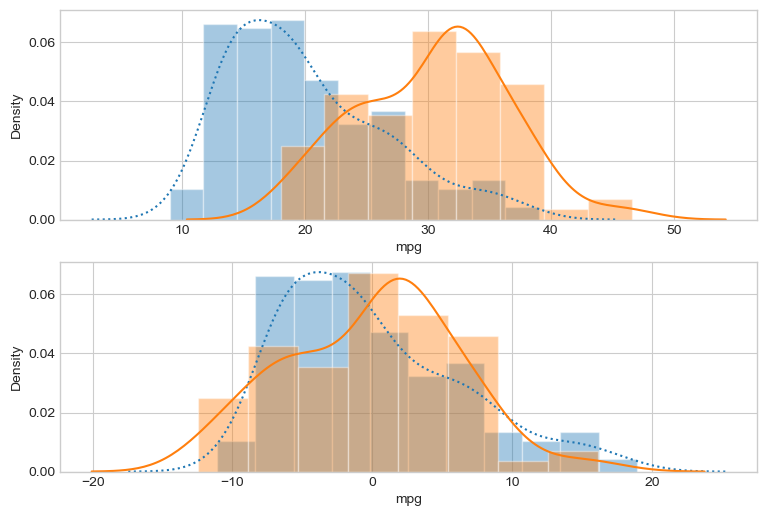

In [57]:
import seaborn

# 2개의 샘플의 정규성 여부를 그래프로 확인
figure = pyplot.figure(figsize = (9, 6))
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)
seaborn.distplot(mpg_usa, kde = True, hist = True, ax = ax1)
seaborn.distplot(mpg_jpn, kde = True, hist = True, ax = ax1)
seaborn.distplot(mpg_usa - mpg_usa.mean(), kde = True, hist = True, ax = ax2)
seaborn.distplot(mpg_jpn - mpg_jpn.mean(), kde = True, hist = True, ax = ax2)
ax1.lines[0].set_linestyle(':')
ax2.lines[0].set_linestyle(':')
pyplot.show()

In [58]:
from scipy import stats

# 2개의 샘플의 등분산성 확인
# scipy.stats.kstest(배열1, 배열2) : Kolmogorove-Smirnov Test, 2개 그룹의 분포가 동일한지 검정
# scipy.stats.kstest(배열, 'norm') : Kolmogorove-Smirnov Test, 데이터가 정규분포를 따르는지 검정
result = stats.kstest(mpg_usa, mpg_jpn)
print(result)
print('statistic(통계량):', result.statistic)
print('p-value(p-값):', result.pvalue)
print('유의확율   5% 미만:', result.pvalue < 0.05)
print('유의확율 0.1% 미만:', result.pvalue < 0.001)

KstestResult(statistic=0.608357480555132, pvalue=2.1431229688890248e-21, statistic_location=23.6, statistic_sign=1)
statistic(통계량): 0.608357480555132
p-value(p-값): 2.1431229688890248e-21
유의확율   5% 미만: True
유의확율 0.1% 미만: True


In [59]:
from scipy import stats

# 2개의 샘플의 등분산성 확인
result_bartlett = stats.bartlett(mpg_usa, mpg_jpn)
result_levene   = stats.levene(mpg_usa, mpg_jpn)

print(result_bartlett)
print(result_levene)
print('바트렛 검정 - 유의확율   5% 미만:', result_bartlett.pvalue < 0.05)
print('바트렛 검정 - 유의확율 0.1% 미만:', result_bartlett.pvalue < 0.001, end = '\n\n')
print('레빈 검정 - 유의확율   5% 미만:', result_levene.pvalue < 0.05)
print('레빈 검정 - 유의확율 0.1% 미만:', result_levene.pvalue < 0.001)

BartlettResult(statistic=0.291256754518036, pvalue=0.5894162958248419)
LeveneResult(statistic=0.15477533928909762, pvalue=0.694270179398643)
바트렛 검정 - 유의확율   5% 미만: False
바트렛 검정 - 유의확율 0.1% 미만: False

레빈 검정 - 유의확율   5% 미만: False
레빈 검정 - 유의확율 0.1% 미만: False


In [60]:
from scipy import stats

# 독립표본(independent-sample, two-sample) t-test : scipy.stats.ttest_1samp
# scipy.stats.ttest_ind(Series[배열1], Series[배열2], equal_var = True/False,
#                       alternative = 'two-sided'/'greater'/'less',
#                       nan_policy = 'propagate'/'raise'/'omit',
#                       random_state = None)
result = stats.ttest_ind(mpg_usa, mpg_jpn, equal_var = True, alternative = 'less')
print(result)
print('statistic(통계량):', result.statistic)
print('p-value(p-값):', result.pvalue)
print('유의확율   5% 미만:', result.pvalue < 0.05)
print('유의확율 0.1% 미만:', result.pvalue < 0.001)

TtestResult(statistic=-12.68433645197139, pvalue=1.5299099885944886e-30, df=326.0)
statistic(통계량): -12.68433645197139
p-value(p-값): 1.5299099885944886e-30
유의확율   5% 미만: True
유의확율 0.1% 미만: True


In [ ]:
# 1. 유럽, 일본 연비 데이터셋(Series)를 추출

# 2. 유럽, 일본 연비 데이터셋 - 정규성 만족
# kstest, shapiro

# 3. 유럽, 일본 연비 데이터셋 - 등산분성 만족
# bartlett, levene

In [74]:
# 1. 유럽, 일본 연비 데이터셋(Series)를 추출
origin_eu  = car2['origin'] == 2
origin_jpn = car2['origin'] == 3
mpg_eu  = car2[origin_eu]['mpg']
mpg_jpn = car2[origin_jpn]['mpg']
pandas.DataFrame({'eu':mpg_eu, 'jpn':mpg_jpn}).head()

,eu,jpn
14,NaN,24.0
18,NaN,27.0
19,26.0,NaN
20,25.0,NaN
21,24.0,NaN


In [73]:
# 2. 유럽, 일본 연비 데이터셋 - 정규성 만족
# kstest, shapiro
from scipy import stats

kstest_eu  = stats.kstest(mpg_eu, 'norm')
kstest_jpn = stats.kstest(mpg_jpn, 'norm')
shapiro_eu  = stats.shapiro(mpg_eu)
shapiro_jpn = stats.shapiro(mpg_jpn)

# 유럽, 일본 생산된 자동차들의 mpg는 정규성을 만족하지 않는다.
# p값이 5%(0.05) 미만인 경유 유의하다 - 정규성을 만족하지 않고, 다르다.
print('KS테스트 5%미만:', kstest_eu.pvalue < 0.05)
print('KS테스트 5%미만:', kstest_jpn.pvalue < 0.05)
print('shapiro테스트 5%미만:', shapiro_eu.pvalue < 0.05)
print('shapiro테스트 5%미만:', shapiro_jpn.pvalue < 0.05)

KS테스트 5%미만: True
KS테스트 5%미만: True
shapiro테스트 5%미만: True
shapiro테스트 5%미만: False


In [76]:
# 3. 유럽, 일본 연비 데이터셋 - 등산분성 만족
# bartlett, levene
from scipy import stats

bartlett_result = stats.bartlett(mpg_eu, mpg_jpn)
levene_result   = stats.levene(mpg_eu, mpg_jpn)
print('바틀렛 test 5%미만:', bartlett_result.pvalue < 0.05)
print('레빈 test 5%미만:', levene_result.pvalue < 0.05)

바틀렛 test 5%미만: False
레빈 test 5%미만: False


In [84]:
# 독립표본(independent-sample, two-sample) t-test : scipy.stats.ttest_1samp
# scipy.stats.ttest_ind(Series[배열1], Series[배열2], equal_var = True/False,
#                       alternative = 'two-sided'/'greater'/'less',
#                       nan_policy = 'propagate'/'raise'/'omit',
#                       random_state = None)
ttest_result = stats.ttest_ind(mpg_eu, mpg_jpn, equal_var = True,
                               alternative = 'less')
print(ttest_result)
print('P값:', ttest_result.pvalue, ttest_result.pvalue * 100)
print(ttest_result.pvalue < 0.025)

TtestResult(statistic=-2.723324735392516, pvalue=0.0036284375134800033, df=145.0)
P값: 0.0036284375134800033 0.36284375134800034
True


In [83]:
import statsmodels.stats.weightstats

# statsmodels.stats.weightstats.ttest_ind(Series[배열1], Series[배열2], usevar = 'pooled'/unequal',
#                                         alternative = 'two-sided'/'larger'/'smaller',
#                                         weights = (None, None))
result = statsmodels.stats.weightstats.ttest_ind(mpg_eu, mpg_jpn, usevar = 'unequal',
                                                 alternative = 'smaller', weights = (None, None))
print(result)
print('statistic(통계량):', result[0])
print('p-value(p-값):', result[1])
print('유의확율   5% 미만:', result[1] < 0.05)
print('유의확율 0.1% 미만:', result[1] < 0.001)

(-2.7075184634992406, 0.003818585780947897, 137.85113736064335)
statistic(통계량): -2.7075184634992406
p-value(p-값): 0.003818585780947897
유의확율   5% 미만: True
유의확율 0.1% 미만: False


##  대응표본(two-sample paired) t-test
1. 단일 모집단에 대한 가설 검정
2. 단일 모집단에 대해 2번의 처리를 가하고, 2개의 처리에 대한 평균 차이을 비교하고자 할 때 사용
3. 모집단의 관측값이 정규분포를 따른다는 가저을 만족해야함 (정규성 가정)
4. 문제에 따라  양측검정(two-sided), 단측검정: 우측검정(greater), 좌측검정(less)
  - 양측검정(two-sided)
    - H0: 집단_처리1 ＝ 집단_처리2
    - H1: 집단_처리1 ≠ 집단_처리2
  - 우측검정(greater)
    - H0: 집단_처리1 ＝ 집단_처리2
    - H1: 집단_처리1 > 집단_처리2
  - 좌측검정(less)
    - H0: 집단_처리1 ＝ 집단_처리2
    - H1: 집단_처리1 < 집단_처리2

In [85]:
blood = pandas.read_csv('blood_pressure.csv', index_col = 'no')
blood

,before,after
no,,
1,130,124
2,134,131
3,140,134
4,132,134
5,145,138
6,147,140
7,131,133
8,150,138
9,152,140


In [86]:
before = blood['before']
after  = blood['after']

print(stats.shapiro(before))
print(stats.shapiro(after))
print('before 정규성 유의확률 5%미만:', stats.shapiro(before).pvalue < 0.05)
print('after  정규성 유의확률 5%미만:', stats.shapiro(after).pvalue < 0.05)

ShapiroResult(statistic=0.9172549843788147, pvalue=0.3346281349658966)
ShapiroResult(statistic=0.8844791054725647, pvalue=0.14683276414871216)
before 정규성 유의확률 5%미만: False
after  정규성 유의확률 5%미만: False


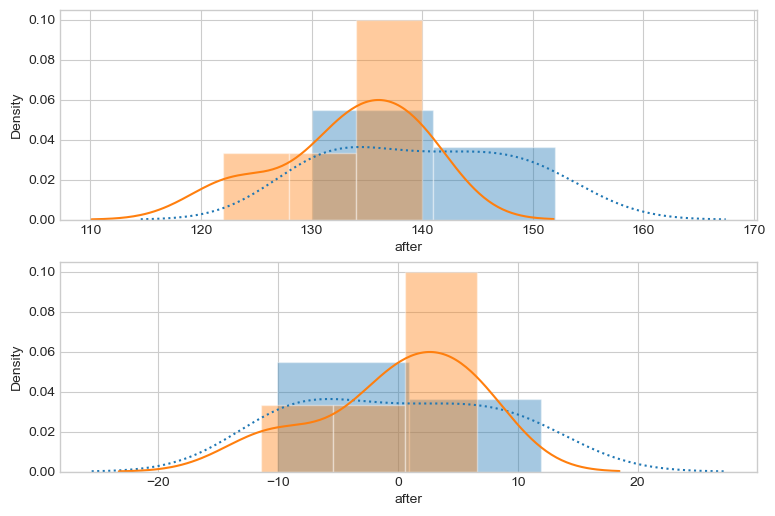

In [87]:
# 2개의 샘플의 정규성 여부를 그래프로 확인
figure = pyplot.figure(figsize = (9, 6))
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)
seaborn.distplot(before, kde = True, hist = True, ax = ax1)
seaborn.distplot(after , kde = True, hist = True, ax = ax1)
seaborn.distplot(before - before.mean(), kde = True, hist = True, ax = ax2)
seaborn.distplot(after  - after.mean() , kde = True, hist = True, ax = ax2)
ax1.lines[0].set_linestyle(':')
ax2.lines[0].set_linestyle(':')
pyplot.show()

In [89]:
from scipy import stats

# 2개의 샘플의 정규분포 만족여부
result = stats.kstest(before, after)
print(result)
print('statistic(통계량):', result.statistic)
print('p-value(p-값):', result.pvalue)
print('유의확율   5% 미만:', result.pvalue < 0.05)
print('유의확율 0.1% 미만:', result.pvalue < 0.001)

KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=140, statistic_sign=-1)
statistic(통계량): 0.4
p-value(p-값): 0.41752365281777043
유의확율   5% 미만: False
유의확율 0.1% 미만: False


In [93]:
from scipy import stats
# 3. 유럽, 일본 연비 데이터셋 - 등분산성 만족
# bartlett, levene
print(stats.bartlett(before, after))
print(stats.levene(before, after))

BartlettResult(statistic=0.5801653126425642, pvalue=0.44624753095178316)
LeveneResult(statistic=1.338617200674537, pvalue=0.262402093042678)


In [95]:
from scipy import stats

# scipy.stats.ttest_rel(Series[배열1], Series[배열2],
#                       alternative = 'two-sided'/'greater'/'less',
#                       nan_policy = 'propagate'/'raise'/'omit')
result = stats.ttest_rel(blood['before'], blood['after'], alternative = 'greater')
print(result)
print('statistic(통계량):', result[0])
print('p-value(p-값):', result[1])
print('유의확율   5% 미만:', result[1] < 0.05)
print('유의확율 0.1% 미만:', result[1] < 0.001)

TtestResult(statistic=3.3970348479747385, pvalue=0.003955202887039574, df=9)
statistic(통계량): 3.3970348479747385
p-value(p-값): 0.003955202887039574
유의확율   5% 미만: True
유의확율 0.1% 미만: False


In [96]:
import statsmodels.stats.weightstats

# statsmodels.stats.weightstats.ttost_paired(Series[배열1], Series[배열2], low, upp,
#                                            transform = None, weights = None)
result = statsmodels.stats.weightstats.ttost_paired(blood['before'], blood['after'],
                                                    0, 14, transform = None, weights = None)
print(result)
print('statistic(통계량):', result[1][0])
print('p-value(p-값):', result[0])
print('유의확율   5% 미만:', result[0] < 0.05)
print('유의확율 0.1% 미만:', result[0] < 0.001)

(0.003955202887039574, (3.3970348479747385, 0.003955202887039574, 9.0), (-3.7012469239127745, 0.00245553529530866, 9.0))
statistic(통계량): 3.3970348479747385
p-value(p-값): 0.003955202887039574
유의확율   5% 미만: True
유의확율 0.1% 미만: False


# scipy.stats 모듈